In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
df = pd.read_csv("New-nov-may15.csv", index_col="datetime")

Merge of two csv datasets from November 1st 2023 - May 15 2024.
Source: https://www.visualcrossing.com/weather/weather-data-services#

In [228]:
df["name"].unique()

array(['Beijing', 'Berlin', 'London', 'Mexico City', 'Moscow', 'Ottawa',
       'Paris', 'Rome', 'Washington DC'], dtype=object)

In [229]:
df.apply(pd.isnull).sum()

name                  0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          735
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation       92
solarenergy          92
uvindex              92
severerisk          460
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              9
dtype: int64

In [230]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

name                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.414552
snow                0.000000
snowdepth           0.000000
windgust            0.000000
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.051889
solarenergy         0.051889
uvindex             0.051889
severerisk          0.259447
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.005076
dtype: float64

In [231]:
valid_columns = df.columns[null_pct < .05]
valid_columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [254]:
df = df[valid_columns].copy()
df.head(1)

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2023-11-01,Beijing,22.6,9.0,15.4,22.6,7.3,15.3,12.2,83.0,0.0,...,1012.9,0.5,2.6,2023-11-01T06:42:32,2023-11-01T17:13:02,0.61,Clear,Clear conditions throughout the day.,clear-day,"ZBAA,54511099999"


In [255]:
df.index = pd.to_datetime(df.index)

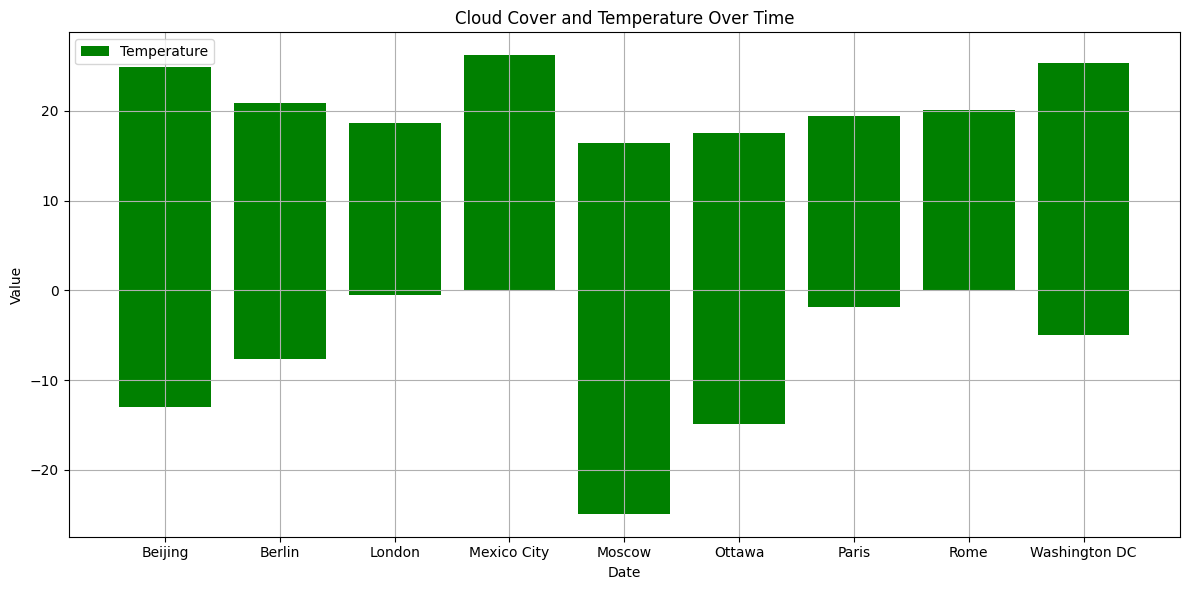

In [234]:
df_filtered = df[df.index <= '2023-11-02']

plt.figure(figsize=(12, 6))
# plt.bar(df["name"], df["cloudcover"], label="Cloud Cover")
plt.bar(df["name"], df["temp"], color="green", label="Temperature")
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Cloud Cover and Temperature Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

What are the independant variables that are affecting the dependant variables?

- dependant: tempmin, tempmax, temp
- independant (most correlation): dew, windspeed, windgust, precip

In [235]:
df["target"] = df.shift(-1)["tempmax"]

- Temperature is typically aggregated in three ways – the maximum temperature, minimum temperature and the arithmetic mean of the temperature.

-  In a typical day, the maximum temperature often occurs in the afternoon and therefore simply reporting the maximum temperature is a good substitute for the overall temperature of day. (may not produce accurate analysis and results)

Hypothesis: If humidity's correlation percentage is temp: -27.54% with temp then humidity must have minor effects on the temperature overall

In [282]:
def calculate_correlation(col_picked):
    correlation_matrix = df.corr(numeric_only=True)

    # Extract the correlation values for the variable column
    variable_correlation = correlation_matrix[col_picked]

    # Filter the correlations to show only those higher or lower than 0.000000
    filtered_correlations = variable_correlation[variable_correlation >= 0.000000]

    filtered_correlations_percentage = filtered_correlations * 100
    sorted_filtered_correlations = filtered_correlations_percentage.sort_values(ascending=False)

    # Print the filtered correlations as percentages]
    for column, value in sorted_filtered_correlations.items():
        print(f"{column}: {value:.2f}%")

def calculate_correlation_all(col_picked, city):
    city_df = df[df["name"] == city]
    correlation_matrix = city_df.corr(numeric_only=True, method="pearson")

    # Extract the correlation values for the variable column
    variable_correlation = correlation_matrix[col_picked]

        # Filter the correlations to show only those higher or lower than 0.000000
    filtered_correlations = variable_correlation[variable_correlation >= 0.500000]

    filtered_correlations_percentage = variable_correlation * 100
    sorted_filtered_correlations = filtered_correlations_percentage.sort_values(ascending=False)

    # Print the filtered correlations as percentages]
    for column, value in sorted_filtered_correlations.items():
        print(f"{city} {column}: {value:.2f}%")

In [362]:
calculate_correlation_all("temp", "Mexico City")

Mexico City temp: 100.00%
Mexico City feelslike: 99.90%
Mexico City tempmax: 88.79%
Mexico City feelslikemax: 85.91%
Mexico City feelslikemin: 66.74%
Mexico City tempmin: 66.45%
Mexico City visibility: 41.13%
Mexico City windspeed: 37.86%
Mexico City windgust: 31.14%
Mexico City moonphase: -6.51%
Mexico City precipprob: -7.50%
Mexico City precip: -7.94%
Mexico City winddir: -8.99%
Mexico City precipcover: -15.56%
Mexico City cloudcover: -15.94%
Mexico City dew: -18.63%
Mexico City sealevelpressure: -63.23%
Mexico City humidity: -72.75%
Mexico City snow: nan%
Mexico City snowdepth: nan%


In [278]:
bei_city = df[df["name"] == "Beijing"]
ber_city = df[df["name"] == "Berlin"]
lon_city = df[df["name"] == "London"]
mx_city = df[df["name"] == "Mexico City"]
mosc_city = df[df["name"] == "Moscow"]
ott_city = df[df["name"] == "Ottawa"]
par_city = df[df["name"] == "Paris"]
rom_city = df[df["name"] == "Rome"]
wadc_city = df[df["name"] == "Washington DC"]

Text(0, 0.5, 'Values')

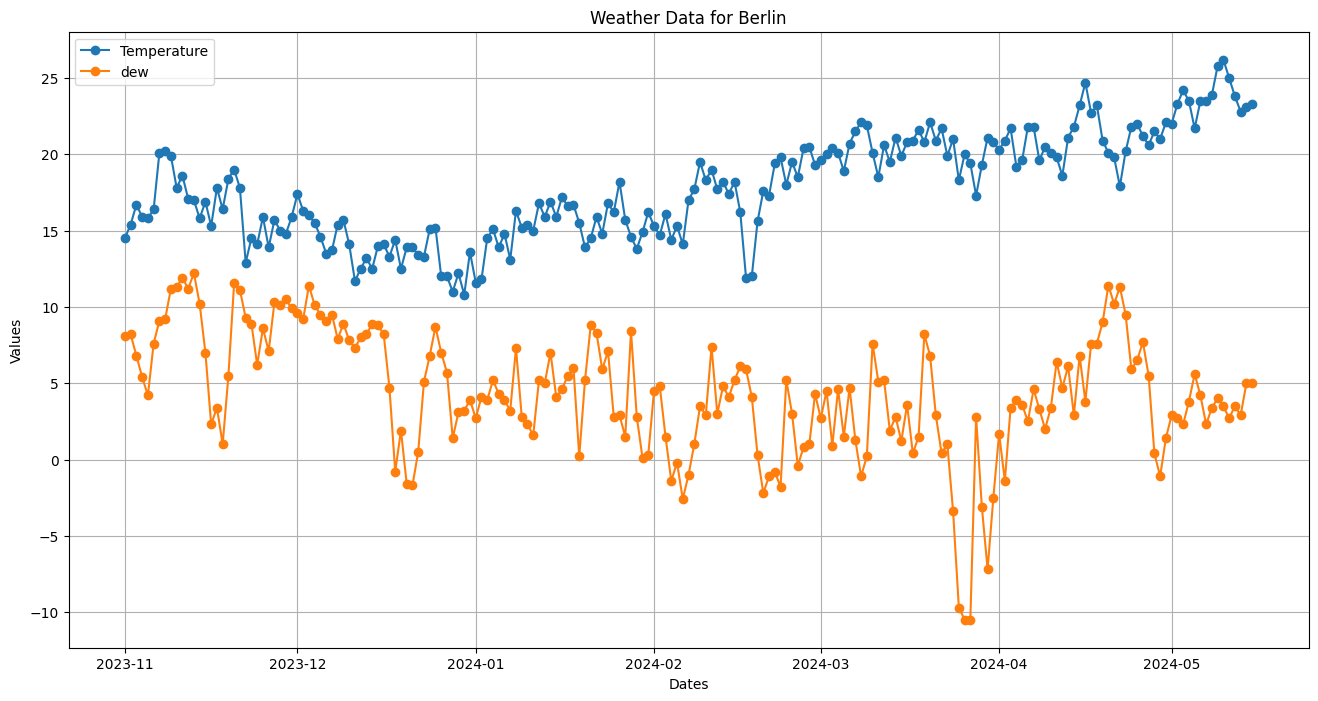

In [339]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(mx_city["temp"], marker="o", label="Temperature")
plt.plot(mx_city["dew"], marker="o", label="dew")
plt.legend()

plt.title('Weather Data for Berlin')
plt.xlabel('Dates')
plt.ylabel('Values')

/tmp/ipykernel_899/2515010805.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation = df.groupby('name').apply(lambda x: x['temp'].corr(x['dew']))


Text(0.5, 1.0, 'Scatter plot of Dew Point vs Temperature')

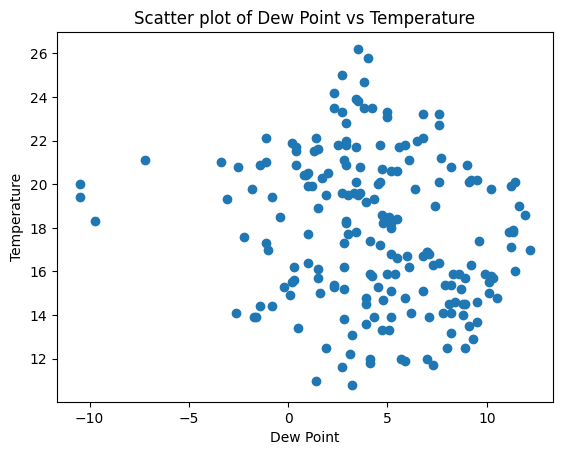

In [359]:
correlation = df.groupby('name').apply(lambda x: x['temp'].corr(x['dew']))

# plt.figure(figsize=(16, 8))
plt.scatter(mx_city['dew'], mx_city['temp'])
plt.xlabel('Dew Point')
plt.ylabel('Temperature')
plt.title('Scatter plot of Dew Point vs Temperature')

In [349]:
from scipy.stats import pearsonr

for location in df['name'].unique():
    temp = df[df['name'] == location]['temp']
    dew = df[df['name'] == location]['dew']
    corr, p_value = pearsonr(temp, dew)
    print(f"Location: {location}, Correlation: {corr}, P-value: {p_value}")

Location: Beijing, Correlation: 0.8091439020528172, P-value: 6.6016513073800875e-47
Location: Berlin, Correlation: 0.8732621169455638, P-value: 8.438691169050886e-63
Location: London, Correlation: 0.885377031399832, P-value: 8.688479561333218e-67
Location: Mexico City, Correlation: -0.18626805469754443, P-value: 0.008774027827265461
Location: Moscow, Correlation: 0.9568401513526846, P-value: 1.3251397366560507e-106
Location: Ottawa, Correlation: 0.9150355445568172, P-value: 8.079362476565577e-79
Location: Paris, Correlation: 0.9089598282976934, P-value: 5.0149877207045257e-76
Location: Rome, Correlation: 0.8126945202150846, P-value: 1.2753674146037683e-47
Location: Washington DC, Correlation: 0.8569393551224124, P-value: 4.938750718288052e-58
